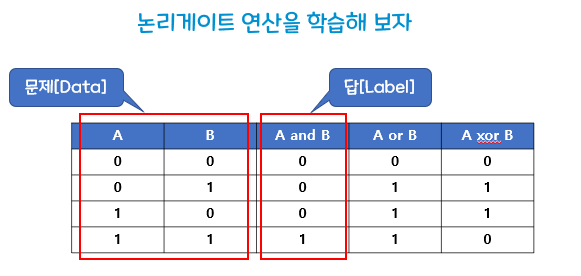

### 1.문제 정의 
- 훈련 데이터와 평가 데이터 이해
- and, or, xor의 결과를 도출하는 머신 러닝 학습 모델의 작동 방식을 이해
  
  

#### 1.1 and 게이트

In [259]:
import pandas as pd

##### 1.데이터 셋팅

In [260]:
# 데이터 셋팅

df = pd.DataFrame({'A':[0,0,1,1,1,0,1,0],
                   'B':[0,1,0,1,0,0,1,1],
                   'A and B':[0,0,0,1,0,0,1,0]})
# train 분리
train = df.iloc[:6]
# test 분리
test = df.iloc[6:]
print(train.shape)
print(train)
print(test.shape)
print(test)

(6, 3)
   A  B  A and B
0  0  0        0
1  0  1        0
2  1  0        0
3  1  1        1
4  1  0        0
5  0  0        0
(2, 3)
   A  B  A and B
6  1  1        1
7  0  1        0


In [261]:
X_train= train.iloc[:,:2]
y_train = train.iloc[:,2]
print(X_train.shape)
print(y_train.shape)

(6, 2)
(6,)


In [262]:
# test 문제와 실제답으로 분리
X_test = test.iloc[:,:2]
y_test = test.iloc[:,2]
print(X_test.shape)
print(y_test.shape)

(2, 2)
(2,)


In [263]:
df

,A,B,A and B
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,0,0,0
6,1,1,1
7,0,1,0


##### 2.데이터 분리

In [264]:
# 데이터 분리
# 문제 데이터 셋 / 평가 데이터 셋으로 분리

# X = df.loc[:,"A":"B"]
# y = df.loc[:,"A and B"]
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [265]:
print(X)
print(y)

   A  B
0  0  0
1  0  1
2  1  0
3  1  1
4  1  0
5  0  0
6  1  1
7  0  1
0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
Name: A and B, dtype: int64


In [266]:
print(X.shape)
print(y.shape)

(8, 2)
(8,)


##### 3.훈련 데이터 / 평가 데이터 셋으로 분리

In [267]:
# 훈련 데이터 / 평가 데이터 셋으로 분리
X_train = X.iloc[0:5,:]
y_train = y[0:5]
X_test =  X.iloc[5:,:]
y_test = y[5:]

In [268]:
# 데이터 형태 확인하기

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5, 2)
(5,)
(3, 2)
(3,)


In [269]:
# ML 모델 학습하기 (KNN모델)
from sklearn.neighbors import KNeighborsClassifier
knn_and = KNeighborsClassifier(n_neighbors=1)

In [270]:
# fit(X_train,y_train): 모델에 데이터를 학습시키는 명령어
# 지도학습인 경우 훈련용 문제 데이터. 평가용 문제 데이터가 입력된다.
knn_and.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [271]:
# predict(X_test): 훈련된 모델과 새로운 문제 데이터를 이용해서 값을 예측하는 명령어
pre = knn_and.predict(X_test)
pre

array([0, 1, 0], dtype=int64)

##### 4.평가 지표

In [272]:
# accuracy_score : 정확도 
from sklearn.metrics import accuracy_score

In [273]:
accuracy_score(y_test, pre)

1.0

#### 1.2 Xor게이트


In [274]:
# 데이터 준비
# 위 데이터 프레임처럼 데이터 셋팅
df = pd.DataFrame({'A':[0,0,1,1,1,0,1,0], # 문제
                   'B':[0,1,0,1,0,0,1,1], # 문제
            'A xor B':[0,1,1,0,1,0,0,1]}) # 정답

# train 분리
train = df.iloc[:6]

# test 분리
test = df.iloc[6:]

# 분리 잘 됐는지 확인 
print(train.shape)
print(train)
print(test.shape)
print(test)

(6, 3)
   A  B  A xor B
0  0  0        0
1  0  1        1
2  1  0        1
3  1  1        0
4  1  0        1
5  0  0        0
(2, 3)
   A  B  A xor B
6  1  1        0
7  0  1        1


In [275]:
# 0~5(6개) 행까지 train
# train 문제와 실제답 분리

X_train= train.iloc[:,:2]
y_train = train.iloc[:,2]
print(X_train.shape)
print(y_train.shape)

(6, 2)
(6,)


In [276]:
# 6~7(2개) 행 test
# test 문제와 실제답으로 분리
X_test = test.iloc[:,:2]
y_test = test.iloc[:,2]
print(X_test.shape)
print(y_test.shape)

(2, 2)
(2,)


In [278]:
# ML 모델 학습하기 (KNN모델)
from sklearn.neighbors import KNeighborsClassifier
knn_xor = KNeighborsClassifier(n_neighbors=1)

In [279]:
knn_xor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [281]:
pre = knn_xor.predict(X_test)
pre

array([0, 1], dtype=int64)

In [287]:
accuracy_score(pre,y_test)

1.0

In [289]:
# 1번째 : score 함수 (정확도)
knn_xor.score(X_test, y_test) # f1_score

1.0

In [300]:
# 2번째: 잘못된 데이터나 모델을 이용해서 평가를 한다면?
knn_and.score(X_test,y_test)


0.0